## This notebook produces a single image if you enter RA and DEC

In [1]:
import numpy
print( 'numpy version: ', numpy.__version__ )

import matplotlib
print( 'matplotlib version: ', matplotlib.__version__ )
import lsst.daf.butler as dafButler
# What version of the LSST Science Pipelnes are we using?
! echo $IMAGE_DESCRIPTION
! eups list -s | grep lsst_distrib

import pandas
pandas.set_option('display.max_rows', 1000)

# allow for matplotlib to create inline plots in our notebook
%matplotlib inline
import matplotlib.pyplot as plt      # imports matplotlib.pyplot as plt
import warnings                      # imports the warnings library

from astropy.wcs import WCS          # imports astropy's World Coordinate System function WCS

from IPython.display import Markdown as md

# from rubin_jupyter_utils.lab.notebook import get_catalog, retrieve_query    
from rubin_jupyter_utils.lab.notebook import get_tap_service, retrieve_query    

import lsst.afw.display as afwDisplay
afwDisplay.setDefaultBackend('matplotlib') 

repo = 's3://butler-us-central1-dp01'  
collection='2.2i/runs/DP0.1'
#collection='1.2i/runs/DP0.1'

# Deprecated
# service = get_catalog()
service = get_tap_service()
butler = dafButler.Butler(repo,collections=collection)



numpy version:  1.20.2
matplotlib version:  3.4.2
Recommended (Weekly 2021_25)
lsst_distrib          21.0.0-3-gc37e2ab+2186fb90a2 	w_2021_25 current setup


Patching auth into notebook.base.handlers.IPythonHandler(notebook.base.handlers.AuthenticatedHandler) -> IPythonHandler(jupyterhub.singleuser.mixins.HubAuthenticatedHandler, notebook.base.handlers.AuthenticatedHandler)
Found credentials in shared credentials file: /home/mpwiesner/.lsst/aws-credentials.ini


## Put RA and DEC here:

In [2]:
ra = 67.0 
dec = -42.5
filter_id = 'g'

## This will produce the output image

In [3]:
import lsst.geom
#my_spherePoint = lsst.geom.SpherePoint(55.745834*lsst.geom.degrees, -32.269167*lsst.geom.degrees)
my_spherePoint = lsst.geom.SpherePoint(ra*lsst.geom.degrees, dec*lsst.geom.degrees)
print(my_spherePoint)

skymap = butler.get('skyMap')
my_tract = skymap.findTract(my_spherePoint)
my_patch = my_tract.findPatch(my_spherePoint)
my_patch_id = my_tract.getSequentialPatchIndex(my_patch)
tract1 = str(my_tract)
tract2 = str(my_patch_id)
tract1_ok = tract1[13:17]
print(tract1_ok)

#dataId = """{'band': """+"""'"""+filter_id+"""','tract': """+tract1_ok+""", 'patch':"""+tract2+"""}"""

dataId = {'band': filter_id, 'tract': int(tract1_ok), 'patch':int(tract2)}


print('my_tract = ', my_tract)
print('my_patch = ', my_patch)
print('my_patch_id = ',my_patch_id)
print(dataId)

(67.0000000000, -42.5000000000)
3083
my_tract =  TractInfo(id=3083)
my_patch =  PatchInfo(index=(5, 3))
my_patch_id =  26
{'band': 'g', 'tract': 3083, 'patch': 26}


This calls the Butler to get the coadded data corresponding to the tract and patch we asked for above

In [4]:
#dataId = {'band': 'i', 'tract': 4641, 'patch':37}
my_deepCoadd = butler.get('deepCoadd',dataId=dataId)


This makes a plot of the coadded data.

(19899.5, 24099.5, 11899.5, 16099.5)

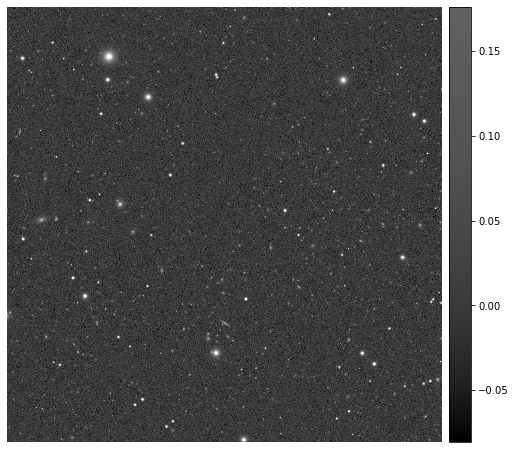

In [5]:
fig = plt.figure(figsize=(10,8))      # create a matplotlib.pyplot figure
afw_display = afwDisplay.Display(1)   # create an alias for the lsst.afw.display.Display() method
afw_display.scale('asinh', 'zscale')  # set the algorithm and scale for the pixel shading
afw_display.mtv(my_deepCoadd.image)   # display the image data you retrieved with the butler
plt.gca().axis('off')                 # turn off the x and y axes labels